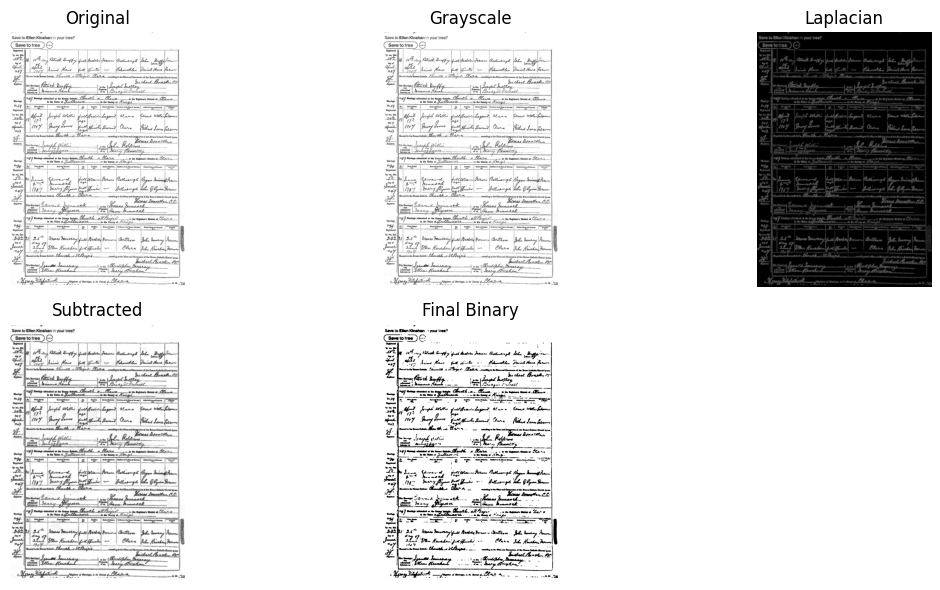

True

In [4]:
# --- Handwritten Text Binarization Demo ---
# Author: Aaron Baggot
# "A new binarization method for degraded document images"

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1. Load image (replace with your handwritten image)
img = cv2.imread("/Users/aaronbaggot/Desktop/Script2Text/data/samples/Handwritten_note.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Denoise slightly using Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5,5), 0)

# 3. Compute Laplacian to highlight edges (foreground strokes)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# 4. Subtract Laplacian from blurred image to suppress background
subtracted = cv2.subtract(blurred, laplacian)

# 5. Apply global threshold (Otsu)
_, binary = cv2.threshold(subtracted, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 6. Morphological cleanup (remove small noise and fill gaps)
kernel = np.ones((3,3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# 7. Show results
titles = ['Original', 'Grayscale', 'Laplacian', 'Subtracted', 'Final Binary']
images = [img, gray, laplacian, subtracted, cleaned]

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8.Save result
cv2.imwrite("original_handwriting.jpg", img)
cv2.imwrite("laplacian_handwriting.jpg", laplacian)
cv2.imwrite("binarized_handwriting.jpg", cleaned)
